In [1]:
#Standard:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

#Statistics: 

from scipy import stats

#Plotting modules and libraries:

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [7]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


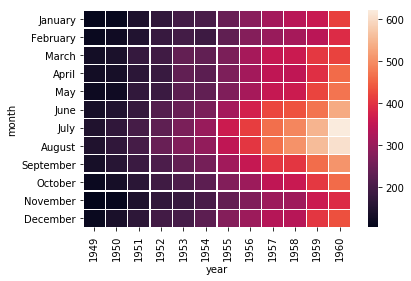

In [12]:
sns.heatmap(flight_dframe,linecolor = 'white',linewidth = 0.3)

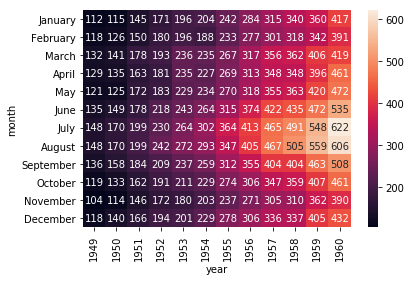

In [20]:
sns.heatmap(flight_dframe,annot = True, fmt = '0.5g')

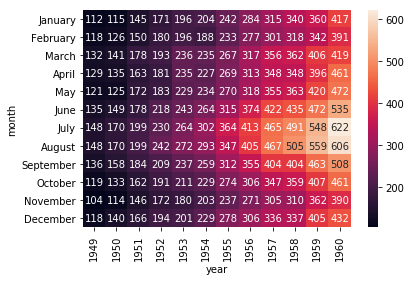

In [21]:
sns.heatmap(flight_dframe,annot = True, fmt = 'd')

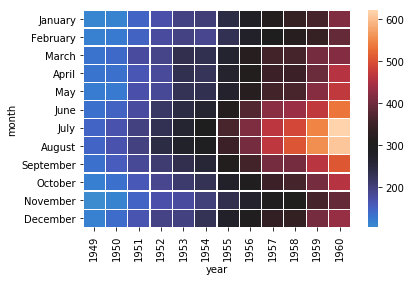

In [23]:
#Now, our darkest region begins from the lowest number. That is our point of reference. The middle
#number is about 350. However, we can set this middle reference number ourselves.

sns.heatmap(flight_dframe,center = flight_dframe.loc['July',1954],linecolor = 'white',linewidth = 0.3)

In [24]:
yearly_flights = flight_dframe.sum()

In [26]:
type(yearly_flights)

pandas.core.series.Series

In [27]:
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [ ]:
# We'll create 2 series and dataframes. One for the years and one for the total. Then we'll concatenate.

In [36]:
years_srs = Series(data = yearly_flights.index)
years_srs

0     1949
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
Name: year, dtype: int64

In [37]:
years_df = DataFrame(data = years_srs)
years_df

,year
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [38]:
flight_total_srs = Series(data = yearly_flights.values)
flight_total_df = DataFrame(data = flight_total_srs)
flight_total_df

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [40]:
final_sum_df = pd.concat([years_df,flight_total_df],axis = 1)
final_sum_df

,year,0
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [41]:
final_sum_df.columns = ['Year','Total no. of Flights']

In [42]:
final_sum_df

,Year,Total no. of Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


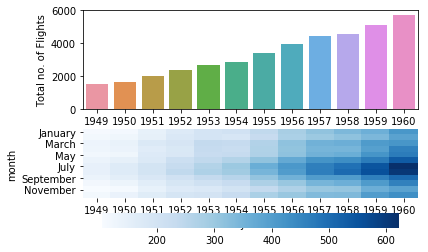

In [45]:
f,(axis1,axis2) = plt.subplots(2,1)
sns.barplot(x = 'Year', y = 'Total no. of Flights', data = final_sum_df, ax = axis1)
sns.heatmap(data = flight_dframe, cmap = 'Blues', ax = axis2, cbar_kws = {'orientation' : 'horizontal' } )

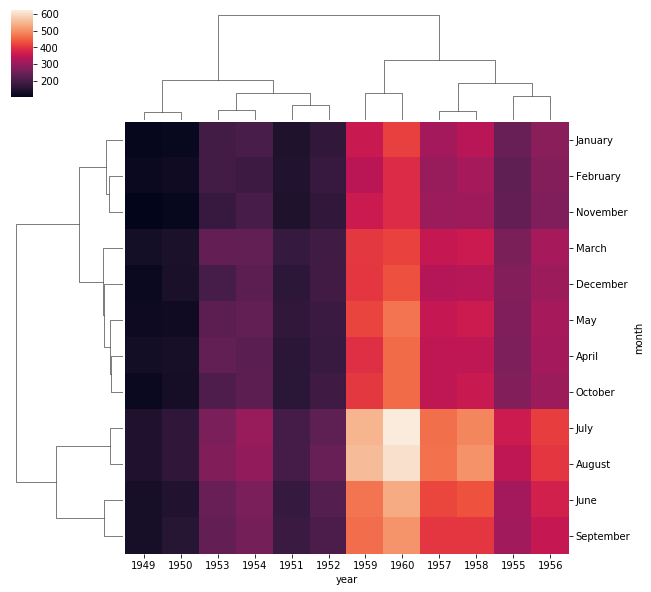

In [46]:
sns.clustermap(flight_dframe)

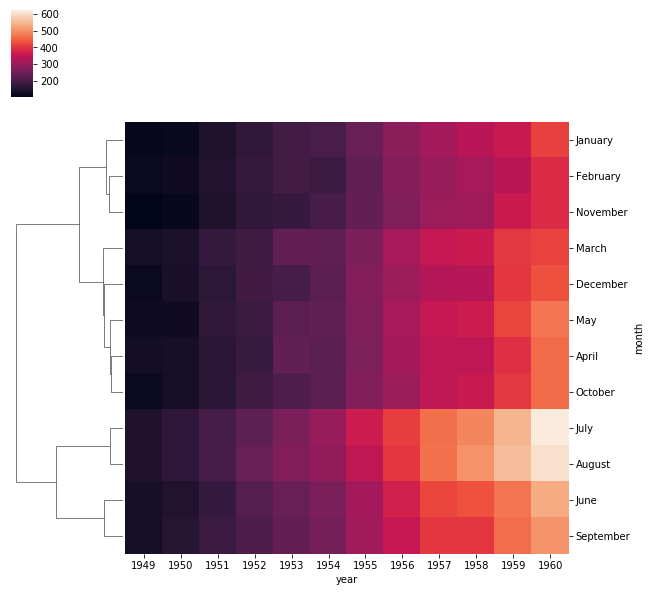

In [49]:
sns.clustermap(flight_dframe,col_cluster = False, row_cluster = True)

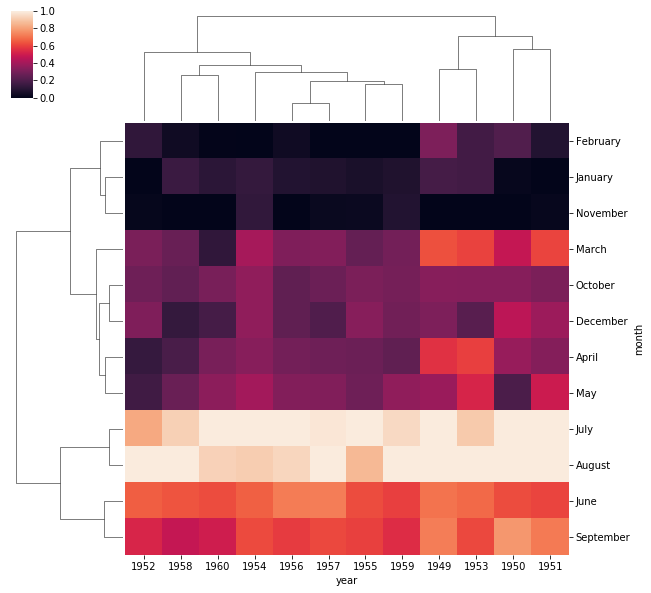

In [50]:
# Since we have flights increasing every year, we need to std.ize the numbers in each year from 0 to 1
# This will eliminate the issue of increasing flights every year. We just analyze by month
sns.clustermap(flight_dframe,standard_scale= 1)

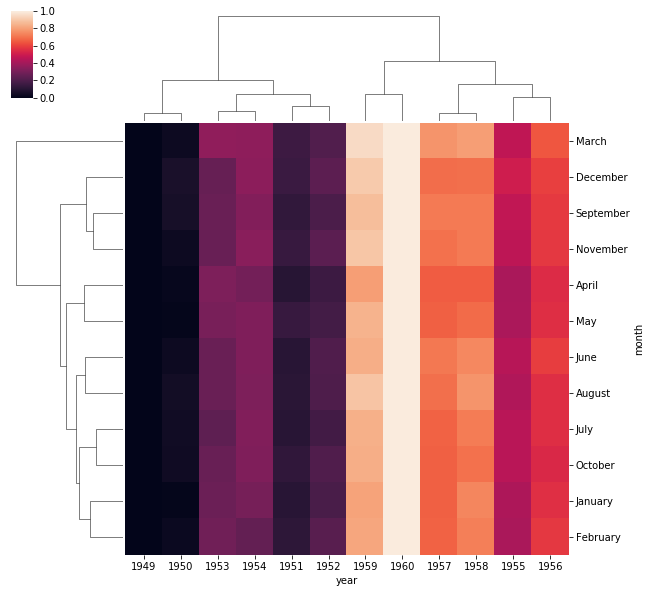

In [51]:
    #Scaling by rows. 
    sns.clustermap(flight_dframe,standard_scale= 0)

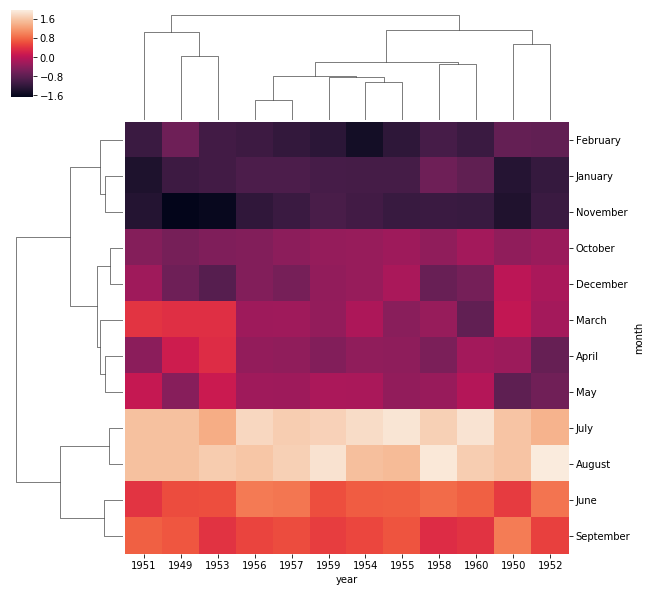

In [55]:
# Entering z score = 0, you subtract row mean from values, and divide by std. dev.
# Entering z score = 1, you subtract column mean from values, and divide by std. dev
sns.clustermap(flight_dframe,z_score  = 1 )